#EJERCICIO 3
Gráficas del 3er ejercicio

> Bloque con sangría

Solución del problema

$$\frac{\partial u}{\partial t}=\frac{\partial^2U}{\partial^2x}$$


$$\frac{\partial u (0,t)}{\partial x}=0, \frac{\partial u (1,t)}{\partial x}=0,   t>0$$

$$u(x,0)=f(x), 0<x<1$$

Para
$$f(x)=\lbrace \begin{array}{lcc} -2 &   si  & 0<x \leq \frac{1}{2} \\\\ 0 &  si & \frac{1}{2} < x < 1 \end{array}$$

Para la condición inicial:

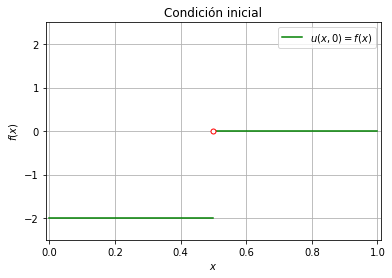

In [12]:
import matplotlib.pyplot as plt
import math
import numpy as np
from pylab import *

def recta(x):
    y = zeros(len(x))
    for i in range(len(x)):
        if x[i]<=1/2:
            y[i]=-2
        elif 1/2<x[i]:
            y[i]=0
    return y
x = np.linspace(0,1,1000)
f = recta(x)
x1 = np.linspace(0, 1/2, num=2)
x2 = np.linspace(1/2, 1, num=2)
plt.plot(x2,[0 for x in x2], "g")
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.plot(x1,[-2 for x in x1], "g", label='$u(x,0)=f(x)$')
plt.plot(0.5, 0, 'ro', markersize=5, fillstyle='full', markerfacecolor='w')
plt.title("Condición inicial")
xlim([-0.01,1.01]),ylim([-2.5,2.5]),grid(),legend()

plt.show()

Usando la serie de Fourier:


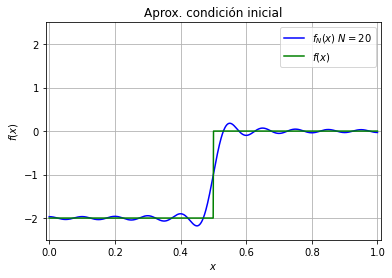

In [13]:
def u_0(x,N=20):
    f = zeros(len(x))
    for n in range(1,N):
        f += (sin((n*pi)/2)/n)*cos(n*pi*x)
    return -1-(4.0/pi)*f
f_n = u_0(x)
plot(x,f_n,"b", label='$f_N(x)$ $N=20$')
plot(x,f, "g", label='$f(x)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aprox. condición inicial")
xlim([-0.01,1.01]),ylim([-2.5,2.5]),grid(),legend()
show()

Aproximación para diferentes cantidades de armónicos:

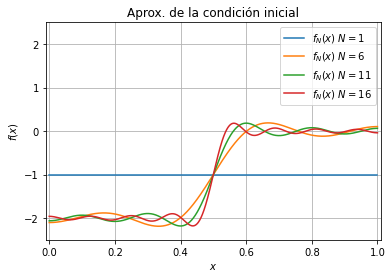

In [14]:
for i in range(1,20,5):
    plot(x,u_0(x,i),label='$f_N(x)$ $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aprox. de la condición inicial")
xlim([-0.01,1.01]),ylim([-2.5,2.5]),grid(),legend()
show()

La solución del problema será:
$$u(x,t)=-1\sum_{n=1}^{\infty}\left(\frac{4}{n\pi} sin \frac{n\pi}{2}\right) cos (n\pi x) e^{-(n\pi)^2 t}$$
Parte temporal

Momento inicial t=0

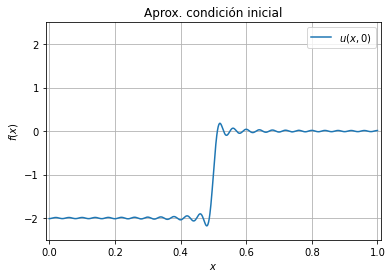

In [15]:
def u_x_t(x,t,N=50):
    f = zeros( (len(x),len(t)) )
    for i in range(len(t)):
        for n in range(1,N):
            f[:,i] += (sin((n*pi)/2)/n)*cos(n*pi*x)*exp(-n**2*pi**2*t[i])

    return -1-(4.0/pi)*f

x = linspace(0,1,1000)
t = linspace(0,10,1000)
U = u_x_t(x,t)

plot(x,U[:,0],label='$u(x,0)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Aprox. condición inicial")
xlim([-0.01,1.01]),ylim([-2.5,2.5]),grid(),legend()
show()

Para diferentes tiempos

Pode mos ver la evolución de la solución cando $t\to \infty$

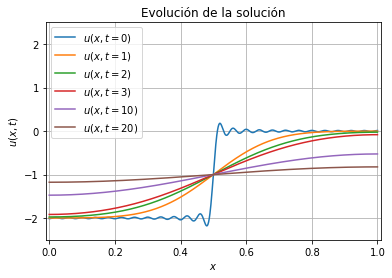

In [16]:
plot(x,U[:,0],label='$u(x,t=0)$') # Mejorar
plot(x,U[:,1],label='$u(x,t=1)$')
plot(x,U[:,2],label='$u(x,t=2)$')
plot(x,U[:,3],label='$u(x,t=3)$')
plot(x,U[:,10],label='$u(x,t=10)$')
plot(x,U[:,20],label='$u(x,t=20)$')
plt.xlabel('$x$'); plt.ylabel('$u(x,t)$'); 
plt.title("Evolución de la solución")
xlim([-0.01,1.01]),ylim([-2.5,2.5]),grid(),legend()
show()

Y finalmente podemos observar una gráfica 3D

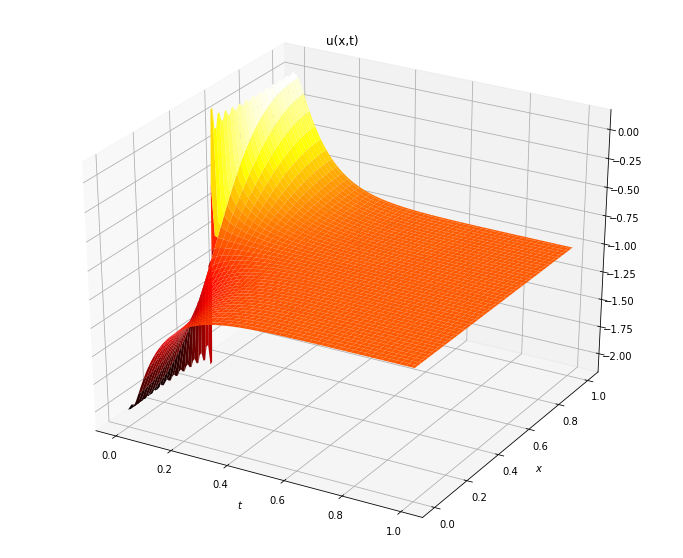

In [17]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,100)
t = linspace(0,1.0,100)

X,T = np.meshgrid(x,t)

U = u_x_t(x,t)

plt.xlabel('$t$'); plt.ylabel('$x$'); 
plt.title("u(x,t)")
ax.plot_surface(X, T, U, cmap="hot");